
# IMPORTING LIBRARIES




In [1]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras import regularizers

# MOUNTING DATASET

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOADING THE DATASET

In [3]:
CustomerData=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Assignment3/CustomerChurn_dataset.csv')

# EXPLANATORY DATA ANALYSIS


In [4]:
# Displaying the first few rows of the dataset
CustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Checking if there are some missing values
CustomerData.isna().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
CustomerData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Checking Data types
CustomerData.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
CustomerData.shape

(7043, 21)

In [9]:
# Getting the summary statistics of numerical features
CustomerData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Checking the data types of the columns
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
CustomerData.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
import plotly.express as px
fig = px.histogram(CustomerData, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

<ipython-input-13-91f6f9fe8781>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-13-91f6f9fe8781>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




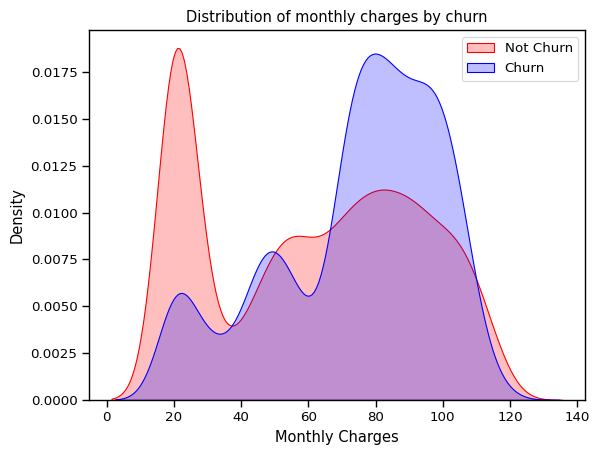

In [13]:
import seaborn as sns
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(CustomerData.MonthlyCharges[(CustomerData["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(CustomerData.MonthlyCharges[(CustomerData["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [14]:
fig = px.box(CustomerData, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

# ENCODING THE DATA

In [16]:
# Perform one-hot encoding
encodedData = pd.get_dummies(CustomerData)
encodedData

# Combine Churn_No and Churn_Yes columns into a single Churn column
encodedData['Churn'] = encodedData['Churn_Yes']

# Drop Churn_No and Churn_Yes columns
encodedData = encodedData.drop(columns=['Churn_No', 'Churn_Yes'])
encodedData

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
encodedData.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn'],
      dtype='object', length=13619)

# FINDING CORRELATION BETWEEN THE DEPENDENT AND INDIPENDENT VARIABLES

<ipython-input-24-644149995788>:7: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation with Churn Rate \n')

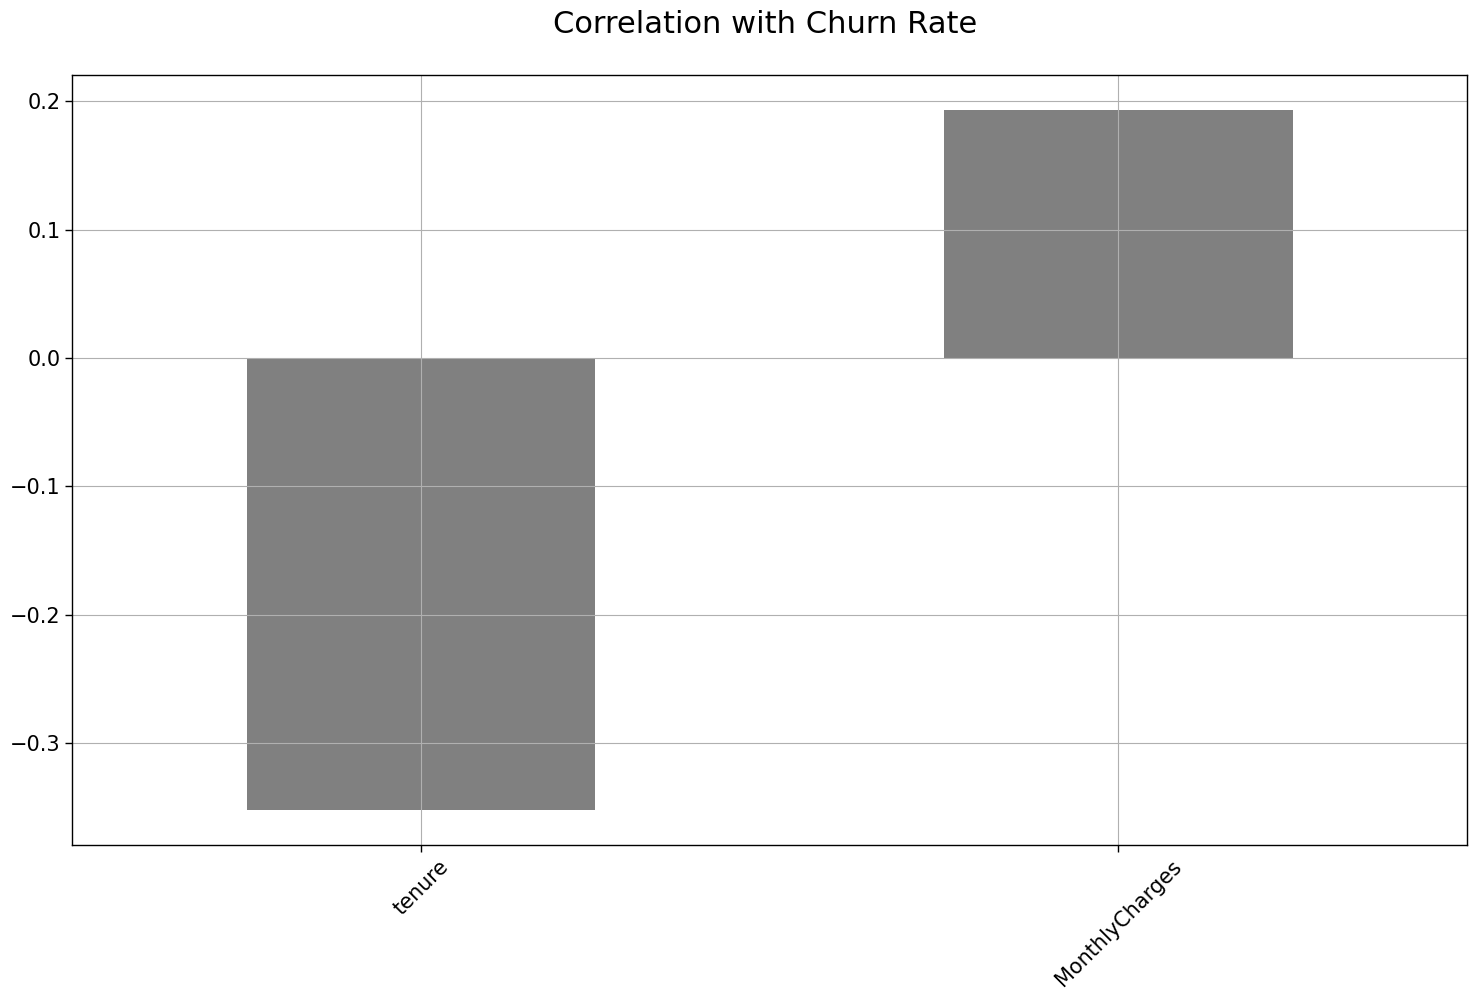

In [24]:
fData = CustomerData[['tenure',
                     'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                     'PaymentMethod','MonthlyCharges','TotalCharges']]

correlations = fData.corrwith(encodedData.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

# PlOTTING THE DISTRIBUTION BETWEEN THE VARIABLES

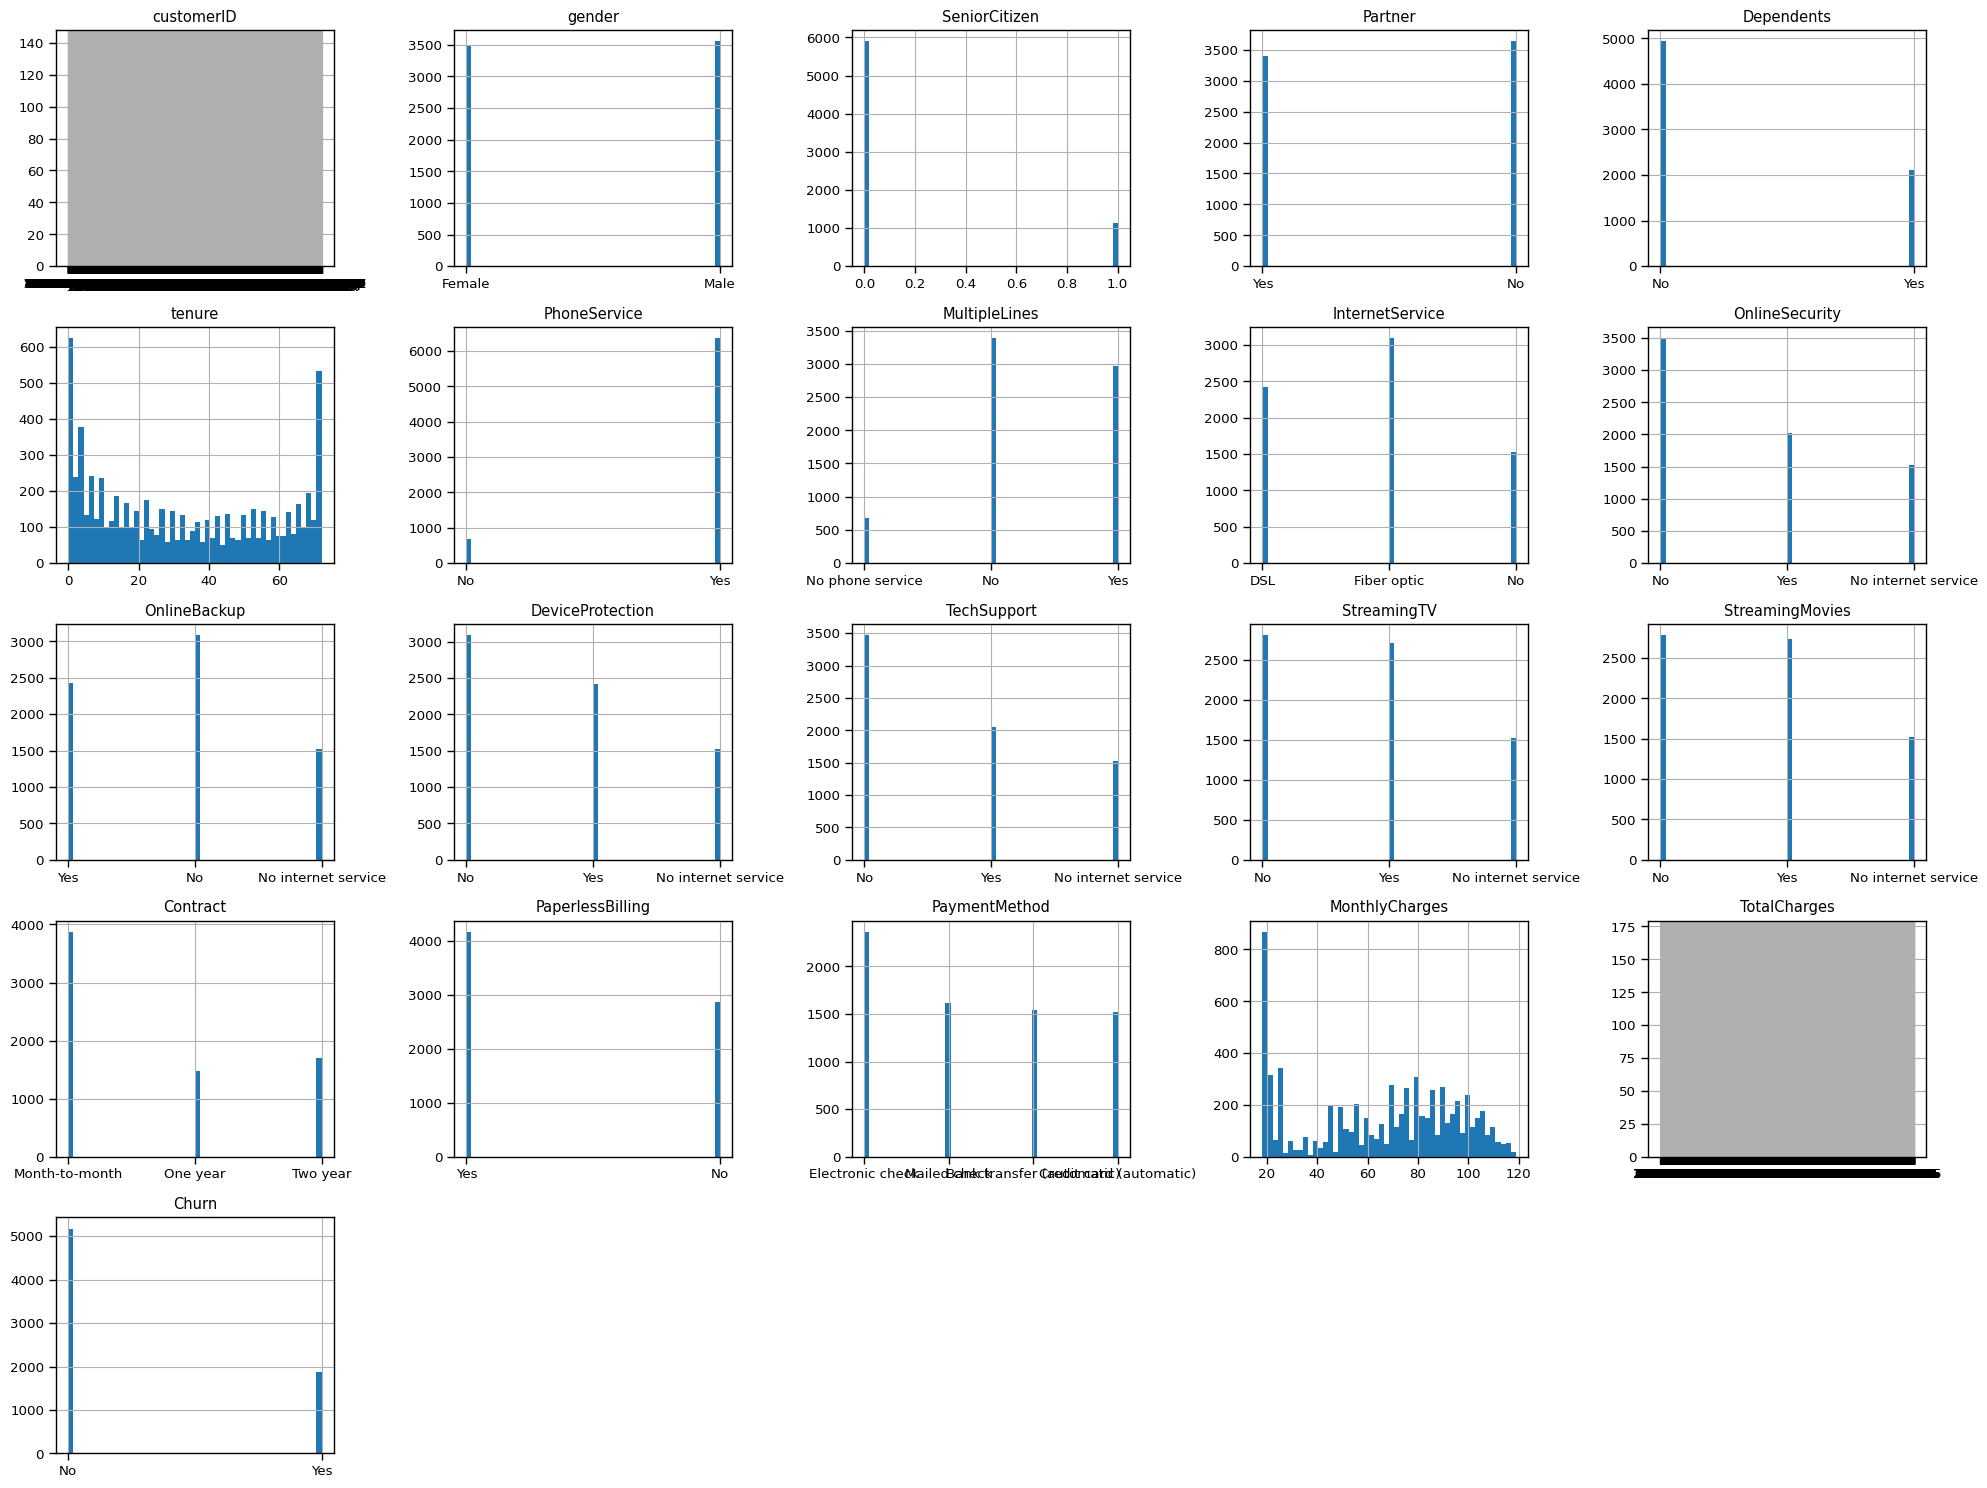

In [25]:
# Create a new figure with a larger size
plt.figure(figsize=(20, 15))

# Iterate through each column in the DataFrame
for i, col in enumerate(CustomerData):
    # Create a subplot for each variable
    plt.subplot(5, 5, i+1)

    # Plot the histogram for the current variable
    CustomerData[col].hist(bins=50)

    # Set the title of the subplot
    plt.title(col)

plt.tight_layout()
plt.show()

# FINDING THE BEST FEATURES

In [26]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Split the data into features (X) and target variable (y)
X = encodedData.drop('Churn', axis=1)
y = encodedData['Churn']

# Perform feature selection using chi-squared test
k = 12  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of selected features
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'TechSupport_No',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


# PLOTTING THE FEATURES

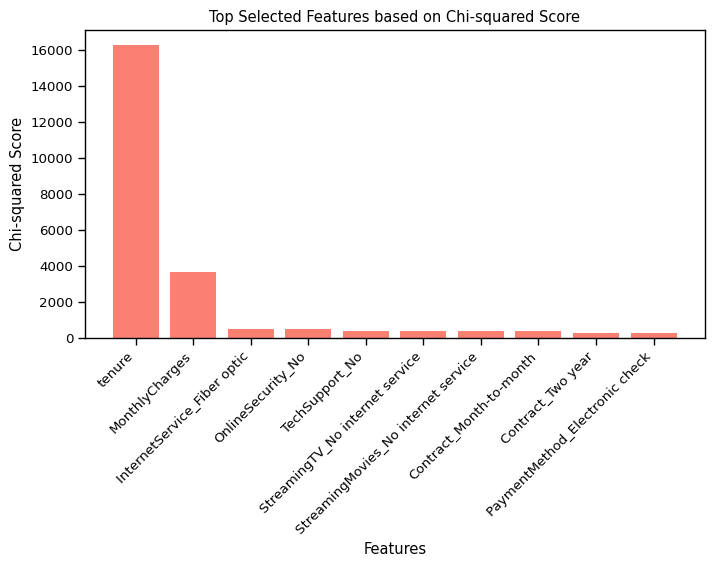

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Split the data into features (X) and target variable (y)
X = encodedData.drop('Churn', axis=1)
y = encodedData['Churn']

# Perform feature selection using chi-squared test
k = 12  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Get chi-squared scores for all features
chi2_scores = selector.scores_

# Create a DataFrame for feature scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': chi2_scores})

# Sort the DataFrame by scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Plot top selected features
plt.figure(figsize=(8, 4))
plt.bar(selected_features, feature_scores_df.loc[feature_scores_df['Feature'].isin(selected_features), 'Score'], color='salmon')
plt.title('Top Selected Features based on Chi-squared Score')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()



In [28]:
encodedData.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn'],
      dtype='object', length=13619)

In [29]:
# Splitting the data into features (X) and target variable (y)
X = encodedData[['tenure', 'MonthlyCharges', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check']]
y = encodedData['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DEFINING THE MODEL, TRAINING AND TESTING


Epoch 1/600
141/141 [==============================] - 1s 3ms/step - loss: 1.0842 - accuracy: 0.7406 - val_loss: 0.8223 - val_accuracy: 0.7862 - lr: 0.0010
Epoch 2/600
114/141 [=======================>......] - ETA: 0s - loss: 0.7358 - accuracy: 0.7791

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



141/141 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.7817 - val_loss: 0.6365 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 3/600
141/141 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7857 - val_loss: 0.5560 - val_accuracy: 0.7737 - lr: 0.0010
Epoch 4/600
141/141 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7874 - val_loss: 0.5173 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 5/600
141/141 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7834 - val_loss: 0.4923 - val_accuracy: 0.7808 - lr: 0.0010
Epoch 6/600
141/141 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7912 - val_loss: 0.4808 - val_accuracy: 0.7799 - lr: 0.0010
Epoch 7/600
141/141 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7897 - val_loss: 0.4728 - val_accuracy: 0.7808 - lr: 0.0010
Epoch 8/600
141/141 [==============================] - 0s 2ms/step - loss: 0

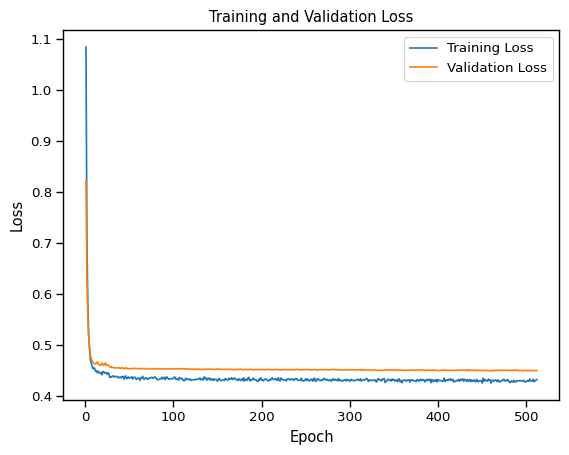

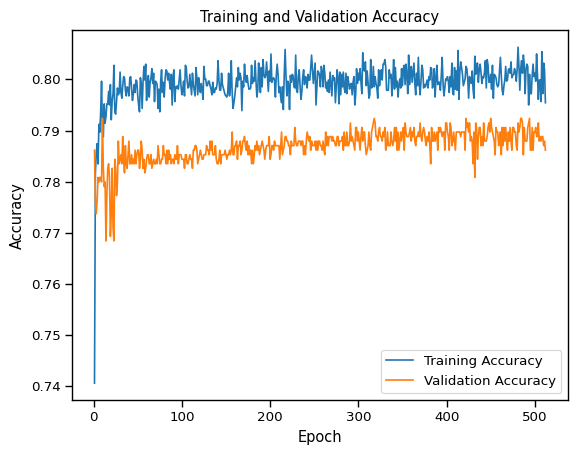

In [31]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))
class LossRateCallback(Callback):
    def __init__(self):
        super().__init__()
        self.loss_rates = []

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.loss_rates.append(loss)

# Create an instance of the callback
loss_callback = LossRateCallback()

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_layer, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Define the ModelCheckpoint callback to save the weights of the best model
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model and get the loss rates
history = model.fit(X_train_scaled, y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1, callbacks=[loss_callback, early_stopping, reduce_lr, mcp_save])

# Get the training and validation metrics from the history object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
num_epochs = len(training_loss)

# Plot the training and validation loss
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# MODEL EVALUATION

In [34]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

45/45 [==============================] - 0s 2ms/step


In [35]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.8f}')
print(f'AUC Score: {auc_score:.8f}')

Accuracy: 0.79418027
AUC Score: 0.83832830


# SAVING THE MODEL

In [36]:
model.save('/content/drive/My Drive/Colab Notebooks/Assignment3/TrainedModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

